## Exercise 01 :

Given the following data table :

|Feature 1| Feature 2| Feature 3 | Feature 4|
|---------|----------|-----------|----------|
|0|0|1|0|
|0|1|1|0|
|1|0|1|1|
|1|1|1|1|


Train the neuron (perceptron) using the data above. Use sigmoid as the activation
function.

In [189]:
import numpy as np
import math

In [190]:
def sigmoid(x):
    'sigmoid activation function'
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    'derivative of sigmoid function'
    return x * (1 - x)

Here we will define a perceptron class, when a perceptron instance is instantiated, it has weights and biases which are random

In [191]:
class Perceptron:
    def __init__(self, input_size: int = None):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.errors : list[float] = []

    def feedforward(self, inputs: np.ndarray) -> float:
        """Forward pass of the perceptron"""
        if len(inputs) != len(self.weights):
            raise ValueError("Inputs and weights must have the same length")
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return sigmoid(weighted_sum)

    def train(
        self,
        inputs: np.ndarray,
        target: np.ndarray,
        learning_rate: float = 0.1,
        epochs: int = 100,
    ) -> None:
        
        for epoch in range(epochs):
            for i in range(len(inputs)):
                # apply forward propagation
                output = self.feedforward(inputs[i])
                error = target[i] - output
                self.errors.append(error)
                # Update weights and bias
                # wi = wi + learning_rate * error * sigmoid_derivative(output) * xi
                # we apply gradient descent
                self.weights += (
                    learning_rate * error * sigmoid_derivative(output) * inputs[i]
                )
                self.bias += learning_rate * error * sigmoid_derivative(output)
            if epoch % 10 == 0:
                print(f" \tEpoch {(epoch + 1)}/{epochs} -> Error: {round(error,5)}")

    def get_class(self, inputs: np.ndarray) -> int:
        return 1 if self.feedforward(inputs) > 0.5 else 0

In [192]:
inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1]])
# we consider the Feature 4 as the targte feature
targets = np.array([0, 0, 1])

In [193]:
# we instantiate the perceptron class
perceptron: Perceptron = Perceptron(input_size=3)
perceptron.train(inputs, targets, learning_rate=0.4, epochs=2000)

 	Epoch 1/2000 -> Error: 0.67793
 	Epoch 11/2000 -> Error: 0.61714
 	Epoch 21/2000 -> Error: 0.49946
 	Epoch 31/2000 -> Error: 0.41122
 	Epoch 41/2000 -> Error: 0.35333
 	Epoch 51/2000 -> Error: 0.3128
 	Epoch 61/2000 -> Error: 0.28248
 	Epoch 71/2000 -> Error: 0.25875
 	Epoch 81/2000 -> Error: 0.23956
 	Epoch 91/2000 -> Error: 0.22368
 	Epoch 101/2000 -> Error: 0.21027
 	Epoch 111/2000 -> Error: 0.19878
 	Epoch 121/2000 -> Error: 0.18881
 	Epoch 131/2000 -> Error: 0.18006
 	Epoch 141/2000 -> Error: 0.17232
 	Epoch 151/2000 -> Error: 0.1654
 	Epoch 161/2000 -> Error: 0.15918
 	Epoch 171/2000 -> Error: 0.15356
 	Epoch 181/2000 -> Error: 0.14844
 	Epoch 191/2000 -> Error: 0.14376
 	Epoch 201/2000 -> Error: 0.13946
 	Epoch 211/2000 -> Error: 0.1355
 	Epoch 221/2000 -> Error: 0.13182
 	Epoch 231/2000 -> Error: 0.12841
 	Epoch 241/2000 -> Error: 0.12523
 	Epoch 251/2000 -> Error: 0.12226
 	Epoch 261/2000 -> Error: 0.11948
 	Epoch 271/2000 -> Error: 0.11686
 	Epoch 281/2000 -> Error: 0.1144


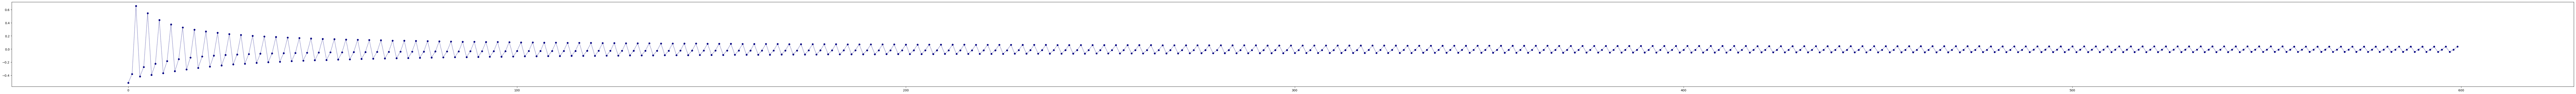

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 5))
plt.plot(perceptron.errors[::10], c="navy", ls="dotted", marker="o", markersize=5)
plt.show()

In [195]:
,# let's test the trained perpecptron
test_input = np.array([1, 1, 1])
prediction: float = perceptron.feedforward(test_input)
class_ = perceptron.get_class(test_input)
print(
    f"Prediction for {test_input}:  \nPrediciton: {round(prediction, 4)} \nClass: {class_}"
)

Prediction for [1 1 1]:  
Prediciton: 0.8444 
Class: 1


In [196]:
# Let's now save the trained perceptron
import pickle

with open("perceptron.pkl", "wb") as f:
    pickle.dump(perceptron, f)
    print(f"PERCEPTRON SAVED AT {f.name}")

PERCEPTRON SAVED AT perceptron.pkl


In [197]:
# Now let's load our perceptron
with open("perceptron.pkl", "rb") as f:
    perceptron = pickle.load(f)
    print(f"PERCEPTRON LOADED SUCCESSFULLY FROM {f.name}")

PERCEPTRON LOADED SUCCESSFULLY FROM perceptron.pkl


In [198]:
other_test_input = np.array([0, 0, 1])
pred: float = perceptron.feedforward(other_test_input)
class_ = perceptron.get_class(other_test_input)
print(
    f"Prediction for {other_test_input}:  \nPrediciton: {round(pred, 4)} \nClass: {class_}"
)

Prediction for [0 0 1]:  
Prediciton: 0.0416 
Class: 0


In [199]:
other_test_input = np.array([0, 1, 1])
pred: float = perceptron.feedforward(other_test_input)
class_ = perceptron.get_class(other_test_input)
print(
    f"Prediction for {other_test_input}:  \nPrediciton: {round(pred, 4)} \nClass: {class_}"
)

Prediction for [0 1 1]:  
Prediciton: 0.0092 
Class: 0


In [200]:
other_test_input = np.array([1, 0, 1])
pred: float = perceptron.feedforward(other_test_input)
class_ = perceptron.get_class(other_test_input)
print(
    f"Prediction for {other_test_input}:  \nPrediciton: {round(pred, 4)} \nClass: {class_}"
)

Prediction for [1 0 1]:  
Prediciton: 0.962 
Class: 1


In [201]:
other_test_input = np.array([1, 0, 0])
pred: float = perceptron.feedforward(other_test_input)
class_ = perceptron.get_class(other_test_input)
print(
    f"Prediction for {other_test_input}:  \nPrediciton: {round(pred, 4)} \nClass: {class_}"
)

Prediction for [1 0 0]:  
Prediciton: 0.9908 
Class: 1
